In [402]:
from sympy import *
from dtumathtools import *
init_printing()

x, y, z, a, b, c = symbols('x y z a b c')

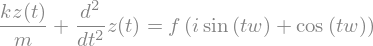

In [403]:
k, w = symbols('k w', real=True)
f, m, t, delta = symbols('f m t delta', real=True, positive=True)
z = Function('z')

eq1 = Eq(z(t).diff(t,2) + k/m*z(t), f*(cos(w*t)+I*sin(w*t))) 
eq1

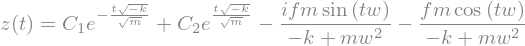

In [404]:
z_dsol = dsolve(eq1, z(t))
z_dsol

In [405]:
la = Symbol('lambda', real=True)
x = c*E**(la * t)
eq2 = Eq(m*x.diff(t,2) + k*x, f*(cos(w*t)+I*sin(w*t)))
eq2

In [406]:
A = symbols('A')
zp = A*exp(I*w*t)
zp

In [407]:
zp.diff(t), zp.diff(t,2)

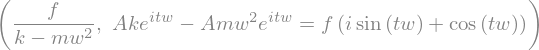

In [413]:
eq3 = Eq(m*zp.diff(t,2) + k*zp, f*(cos(w*t)+I*sin(w*t)))
A_sol = solve(eq3, A)[0]
A_sol, eq3

In [414]:
z_hom = dsolve(Eq(z(t).diff(t,2) + k/m*z(t), 0), z(t)).rhs
z_hom.subs("C2", 0)

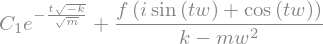

In [415]:
zpf = z_hom + A_sol * (cos(w*t)+I*sin(w*t))
zpf.subs("C2", 0)

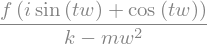

In [416]:
zpf2 = A_sol * (cos(w*t)+I*sin(w*t))
zpf2

In [418]:
(m*zpf2.diff(t,2)+k*zpf2).simplify(), re((m*zpf2.diff(t,2)+k*zpf2).simplify())

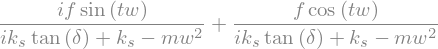

In [423]:
zppp = zpf2.subs(k, k_s*(1+tan(delta)*I)).expand()
zppp

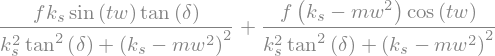

In [425]:
xppp = zppp.as_real_imag()[0]
xppp

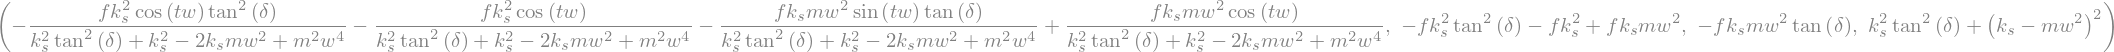

In [481]:
tand = symbols('tan(delta)', real=True)
kk = k_s*(1+tan(delta)*I)
fffhm = (-kk*zppp).as_real_imag()[0].expand()
fffhm_topcos = (-kk*zppp).as_real_imag()[0].as_numer_denom()[0].expand().coeff(cos(w*t))
fffhm_topsin = (-kk*zppp).as_real_imag()[0].as_numer_denom()[0].expand().coeff(sin(w*t))
fffhm_bot = (-kk*zppp).as_real_imag()[0].as_numer_denom()[1]
fffhm, fffhm_topcos, fffhm_topsin, fffhm_bot

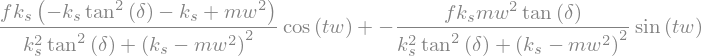

In [505]:
fffhm_12 = Add(Mul(fffhm_topcos.subs(tan(delta)**2, tand).simplify().subs(tand, tan(delta)**2)/fffhm_bot, cos(w*t), evaluate=False) + Mul(fffhm_topsin/fffhm_bot, sin(w*t), evaluate=False), evaluate=False)
fffhm_12

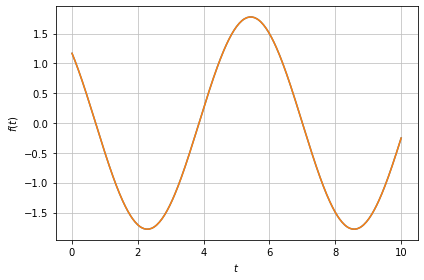

In [519]:
p1 = dtuplot.plot(fffhm_11.subs(eval_set), (t, 0, 10), show=False)
p2 = dtuplot.plot(fffhm_12.subs(eval_set), (t, 0, 10), show=False)
comb = p1 + p2
comb.legend = False
comb.show()

In [510]:
(m*xppp.diff(t,2) - fffhm_12).simplify()

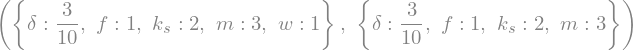

In [583]:
eval_set = {k_s: 2, m: 3, w: 1, f: 1, delta: S(3)/10}
eval_setw = {k_s: 2, m: 3, f: 1, delta: S(3)/10}
eval_set, eval_setw

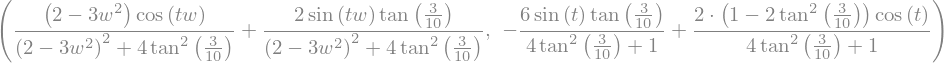

In [584]:
plt1 = xppp.subs(eval_setw)
plt2 = fffhm_12.subs(eval_set)
plt1, plt2

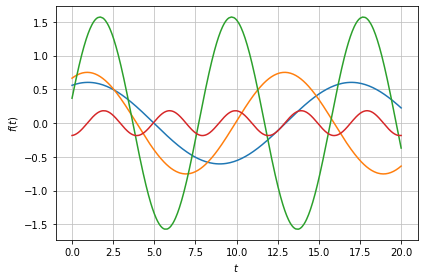

In [585]:
p1 = dtuplot.plot(xppp.subs(eval_setw).subs(w,pi/8), (t, 0, 20), show=False, use_cm=False)
p2 = dtuplot.plot(xppp.subs(eval_setw).subs(w,pi/6), (t, 0, 20), show=False, use_cm=False)
p3 = dtuplot.plot(xppp.subs(eval_setw).subs(w,pi/4), (t, 0, 20), show=False, use_cm=False)
p4 = dtuplot.plot(xppp.subs(eval_setw).subs(w,pi/2), (t, 0, 20), show=False, use_cm=False)
comb = p1 + p2 + p3 + p4
comb.legend = False
comb.show()

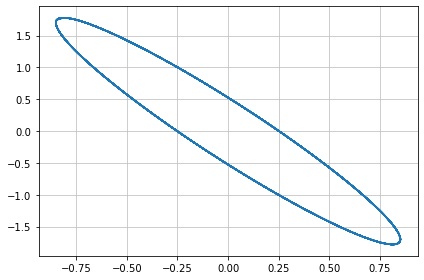

In [586]:
dtuplot.plot_parametric(*(Matrix([plt1, plt2]).subs(w,1)), (t, 0, 100), use_cm=False)

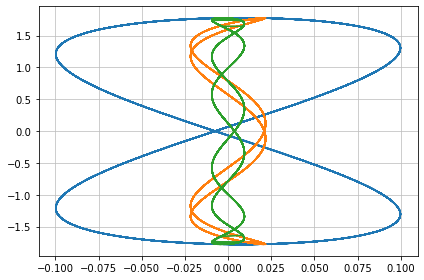

In [587]:
p1 = dtuplot.plot_parametric(*(Matrix([plt1, plt2]).subs(w,2)), (t, 0, 100), use_cm=False, show=False)
p2 = dtuplot.plot_parametric(*(Matrix([plt1, plt2]).subs(w,4)), (t, 0, 100), use_cm=False, show=False)
p3 = dtuplot.plot_parametric(*(Matrix([plt1, plt2]).subs(w,6)), (t, 0, 100), use_cm=False, show=False)
comb = p1 + p2 + p3
comb.legend = False
comb.show()

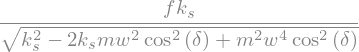

In [589]:
aa = fffhm_topcos.subs(tan(delta)**2, tand).simplify() / fffhm_bot
bb = fffhm_topsin / fffhm_bot
AH = sqrt(aa**2+bb**2).simplify().subs(tand, tan(delta)**2).simplify()
AH

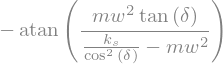

In [641]:
phiH = -atan((fffhm_topsin/fffhm_bot)/(fffhm_topcos/fffhm_bot)).simplify()
phiH

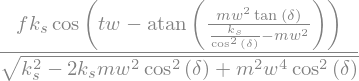

In [591]:
fffhm_11 = AH*cos(w*t+phiH)
fffhm_11

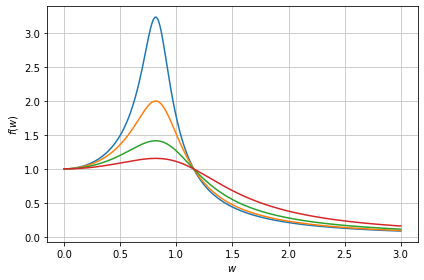

In [642]:
eval_setwd = {k_s: 2, m: 3, f: 1}
p1 = dtuplot.plot(AH.subs(eval_setwd).subs(delta, pi/10), (w, 0, pi), use_cm=False, show=False)
p2 = dtuplot.plot(AH.subs(eval_setwd).subs(delta, pi/6), (w, 0, pi), use_cm=False, show=False)
p3 = dtuplot.plot(AH.subs(eval_setwd).subs(delta, pi/4), (w, 0, pi), use_cm=False, show=False)
p4 = dtuplot.plot(AH.subs(eval_setwd).subs(delta, pi/3), (w, 0, pi), use_cm=False, show=False)
comb = p1 + p2 + p3 + p4
comb.legend = False
comb.show()

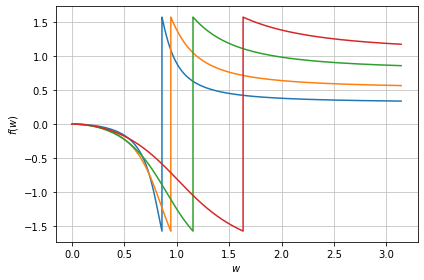

In [643]:
eval_setwd = {k_s: 2, m: 3, f: 1}
p1 = dtuplot.plot(phiH.subs(eval_setwd).subs(delta, pi/10), (w, 0, pi), use_cm=False, show=False)
p2 = dtuplot.plot(phiH.subs(eval_setwd).subs(delta, pi/6), (w, 0, pi), use_cm=False, show=False)
p3 = dtuplot.plot(phiH.subs(eval_setwd).subs(delta, pi/4), (w, 0, pi), use_cm=False, show=False)
p4 = dtuplot.plot(phiH.subs(eval_setwd).subs(delta, pi/3), (w, 0, pi), use_cm=False, show=False)
comb = p1 + p2 + p3 + p4
comb.legend = False
comb.show()

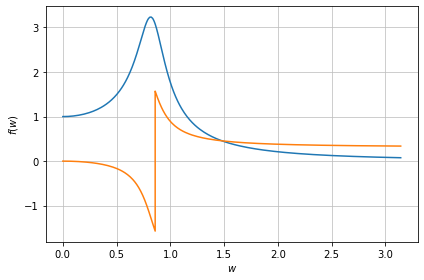

In [650]:
p1 = dtuplot.plot(AH.subs(eval_setwd).subs(delta, pi/10), (w, 0, pi), use_cm=False, show=False)
p2 = dtuplot.plot(phiH.subs(eval_setwd).subs(delta, pi/10), (w, 0, pi), use_cm=False, show=False)
comb = p1 + p2
comb.legend = False
comb.show()

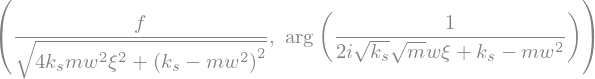

In [636]:
xi = symbols('xi', real=True)
AV = f/sqrt((k_s-m*w**2)**2 + 4*k_s*m*w**2*xi**2)
phiV = arg(1/(k_s - m*w**2+2*xi*w*sqrt(k_s*m)*I))
AV, phiV

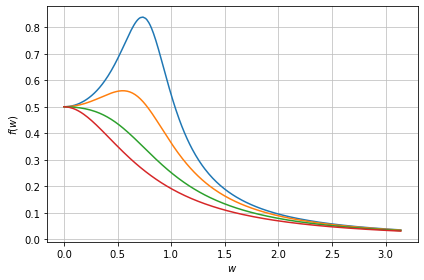

In [644]:
eval_setwxi = {k_s: 2, m: 3, f: 1}
p1 = dtuplot.plot(AV.subs(eval_setwd).subs(xi, pi/10), (w, 0, pi), use_cm=False, show=False)
p2 = dtuplot.plot(AV.subs(eval_setwd).subs(xi, pi/6), (w, 0, pi), use_cm=False, show=False)
p3 = dtuplot.plot(AV.subs(eval_setwd).subs(xi, pi/4), (w, 0, pi), use_cm=False, show=False)
p4 = dtuplot.plot(AV.subs(eval_setwd).subs(xi, pi/3), (w, 0, pi), use_cm=False, show=False)
comb = p1 + p2 + p3 + p4
comb.legend = False
comb.show()

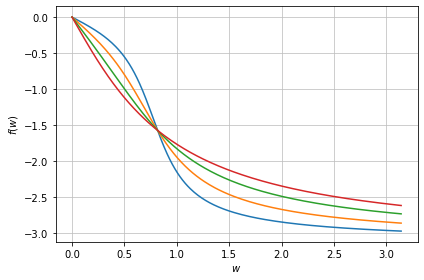

In [645]:
eval_setwxi = {k_s: 2, m: 3, f: 1}
p1 = dtuplot.plot(phiV.subs(eval_setwd).subs(xi, pi/10), (w, 0, pi), use_cm=False, show=False)
p2 = dtuplot.plot(phiV.subs(eval_setwd).subs(xi, pi/6), (w, 0, pi), use_cm=False, show=False)
p3 = dtuplot.plot(phiV.subs(eval_setwd).subs(xi, pi/4), (w, 0, pi), use_cm=False, show=False)
p4 = dtuplot.plot(phiV.subs(eval_setwd).subs(xi, pi/3), (w, 0, pi), use_cm=False, show=False)
comb = p1 + p2 + p3 + p4
comb.legend = False
comb.show()

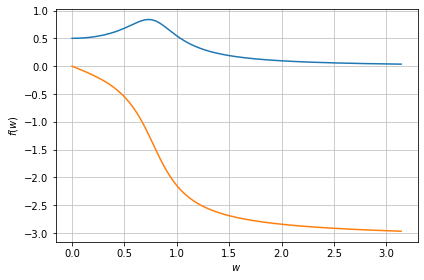

In [649]:
p1 = dtuplot.plot(AV.subs(eval_setwd).subs(xi, pi/10), (w, 0, pi), use_cm=False, show=False)
p2 = dtuplot.plot(phiV.subs(eval_setwd).subs(xi, pi/10), (w, 0, pi), use_cm=False, show=False)
comb = p1 + p2
comb.legend = False
comb.show()

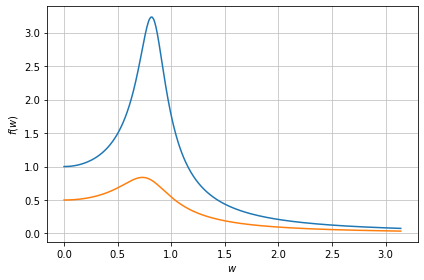

In [651]:
p1 = dtuplot.plot(AH.subs(eval_setwd).subs(delta, pi/10), (w, 0, pi), use_cm=False, show=False)
p2 = dtuplot.plot(AV.subs(eval_setwd).subs(xi, pi/10), (w, 0, pi), use_cm=False, show=False)
comb = p1 + p2
comb.legend = False
comb.show()

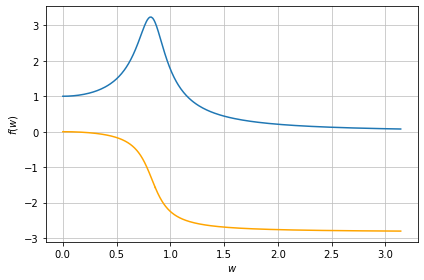

In [720]:
p1 = dtuplot.plot(phiH.subs(eval_setwd).subs(delta, pi/10), (w, 0, flip_sol1-0.00001), use_cm=False, show=False, rendering_kw={'color': 'orange'})
p11 = dtuplot.plot(-pi + phiH.subs(eval_setwd).subs(delta, pi/10), (w, flip_sol1+0.00001, pi), use_cm=False, show=False, rendering_kw={'color': 'orange'})
p2 = dtuplot.plot(AH.subs(eval_setwd).subs(delta, pi/10), (w, 0, pi), use_cm=False, show=False)
comb = p2 + p1 + p11
comb.legend = False
comb.show()

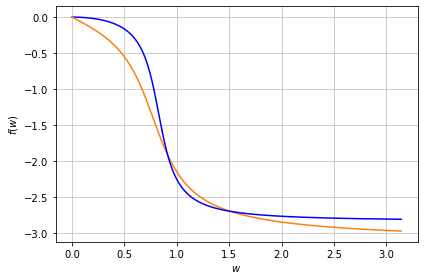

In [716]:
p1 = dtuplot.plot(phiH.subs(eval_setwd).subs(delta, pi/10), (w, 0, flip_sol1-0.00001), use_cm=False, show=False, rendering_kw={'color': 'blue'})
p11 = dtuplot.plot(-pi + phiH.subs(eval_setwd).subs(delta, pi/10), (w, flip_sol1+0.00001, pi), use_cm=False, show=False, rendering_kw={'color': 'blue'})
p2 = dtuplot.plot(phiV.subs(eval_setwd).subs(xi, pi/10), (w, 0, pi), use_cm=False, show=False)
comb = p1 + p2 + p11
comb.legend = False
comb.show()

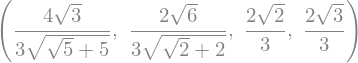

In [708]:
flip_sol1 = max(solve(Eq(tan(phiH.subs(eval_setwd).subs(delta, pi/10)).as_numer_denom()[1],0)))
flip_sol2 = max(solve(Eq(tan(phiH.subs(eval_setwd).subs(delta, pi/8)).as_numer_denom()[1],0)))
flip_sol3 = max(solve(Eq(tan(phiH.subs(eval_setwd).subs(delta, pi/6)).as_numer_denom()[1],0)))
flip_sol4 = max(solve(Eq(tan(phiH.subs(eval_setwd).subs(delta, pi/4)).as_numer_denom()[1],0)))
flip_sol1, flip_sol2, flip_sol3, flip_sol4

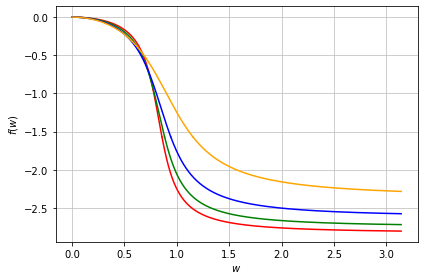

In [712]:
p1 = dtuplot.plot(phiH.subs(eval_setwd).subs(delta, pi/10), (w, 0, flip_sol1-0.00001), use_cm=False, show=False, rendering_kw={'color': 'red'})
p11 = dtuplot.plot(-pi + phiH.subs(eval_setwd).subs(delta, pi/10), (w, flip_sol1+0.00001, pi), use_cm=False, show=False, rendering_kw={'color': 'red'})
p2 = dtuplot.plot(phiH.subs(eval_setwd).subs(delta, pi/8), (w, 0, flip_sol2-0.00001), use_cm=False, show=False, rendering_kw={'color': 'green'})
p22 = dtuplot.plot(-pi + phiH.subs(eval_setwd).subs(delta, pi/8), (w, flip_sol2+0.00001, pi), use_cm=False, show=False, rendering_kw={'color': 'green'})
p3 = dtuplot.plot(phiH.subs(eval_setwd).subs(delta, pi/6), (w, 0, flip_sol3-0.00001), use_cm=False, show=False, rendering_kw={'color': 'blue'})
p33 = dtuplot.plot(-pi + phiH.subs(eval_setwd).subs(delta, pi/6), (w, flip_sol3+0.00001, pi), use_cm=False, show=False, rendering_kw={'color': 'blue'})
p4 = dtuplot.plot(phiH.subs(eval_setwd).subs(delta, pi/4), (w, 0, flip_sol4-0.00001), use_cm=False, show=False, rendering_kw={'color': 'orange'})
p44 = dtuplot.plot(-pi + phiH.subs(eval_setwd).subs(delta, pi/4), (w, flip_sol4+0.00001, pi), use_cm=False, show=False, rendering_kw={'color': 'orange'})
comb = p1 + p11 + p2 + p22 + p3 + p33 + p4 + p44
comb.legend = False
comb.show()

In [672]:
def TR_SIMP(expr):
    from sympy.simplify.fu import TR0, TR1, TR2, TR2i, TR3, TR4, TR5, TR6, TR7, TR8, TR9, TR10, TR10i, TR11, TR12, TR12i, TR13, TRmorrie, TR14, TR15, TR16, TR22, TR111
    
    func_list = [TR0, TR1, TR2, TR2i, TR3, TR4, TR5, TR6, TR7, TR8, TR9, TR10, TR10i, TR11, TR12, TR12i, TR13, TRmorrie, TR14, TR15, TR16, TR22, TR111]
    for func in func_list:
        expr = func(expr)
        display(str(func), expr.simplify())